Market data (2013-2025): (12, 5)
    Year  Gold_Mumbai  Gold_London  Silver_Mumbai  Silver_NY
0   2013      29190.0      25739.0        46637.0    41643.0
1   2014      27415.0      24520.0        40558.0    35611.0
2   2015      26534.0      24232.0        36318.0    32092.0
3   2016      29665.0      27116.0        42748.0    38360.0
4   2017      29300.0      26619.0        39072.0    34962.0
5   2018      31193.0      28380.0        38404.0    34540.0
6   2019      37018.0      33347.0        42514.0    37688.0
7   2020      48723.0      43541.0        59283.0    54499.0
8   2021      47999.0      43582.0        65426.0    58848.0
9   2022      52731.0      46606.0        61991.0    55348.0
10  2023      60624.0      52684.0        72243.0    62821.0
11  2024      75842.0      70315.0        89131.0    82685.0

YoY % Changes (Anomaly Features):
    Year  Gold_Mum_YoY  Gold_Lon_YoY  Silver_Mum_YoY  Silver_NY_YoY
0   2014          -6.1          -4.7           -13.0          -14.5
1  

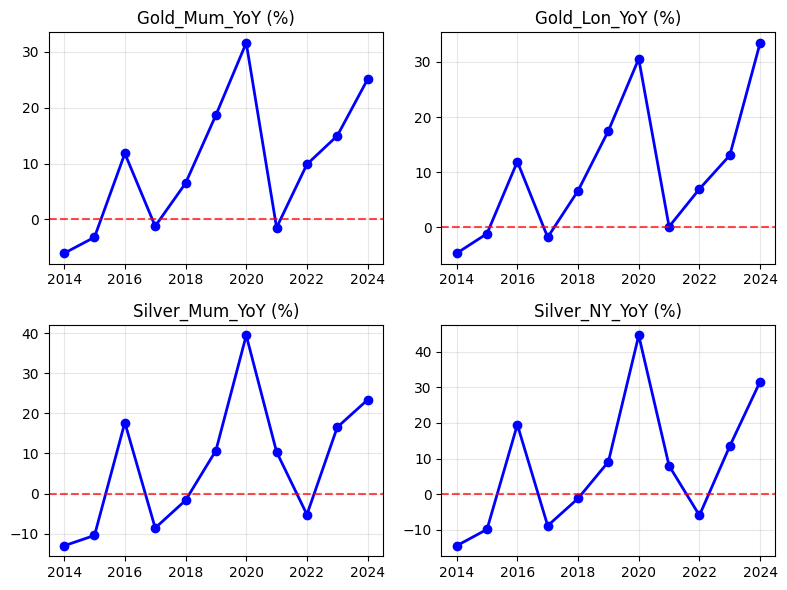


=== ISOLATION FOREST ANOMALY DETECTION ===
Isolation Forest Results:
    Year  ISO_Label  ISO_Score
0   2014          1      0.000
1   2015          1      0.097
2   2016          1      0.107
3   2017          1      0.110
4   2018          1      0.108
5   2019          1      0.079
6   2020         -1     -0.078
7   2021          1      0.068
8   2022          1      0.090
9   2023          1      0.125
10  2024         -1     -0.003

=== ONE-CLASS SVM ANOMALY DETECTION ===
One-Class SVM Results:
    Year  OCSVM_Label  OCSVM_Score
0   2014            1        0.000
1   2015            1        0.058
2   2016           -1       -0.001
3   2017            1        0.072
4   2018            1        0.074
5   2019           -1       -0.000
6   2020           -1       -0.000
7   2021           -1       -0.000
8   2022            1        0.000
9   2023            1        0.032
10  2024            1        0.000

=== COMBINED ANOMALY RESULTS ===
    Year  Combined_Score  Anomaly_Flag
0

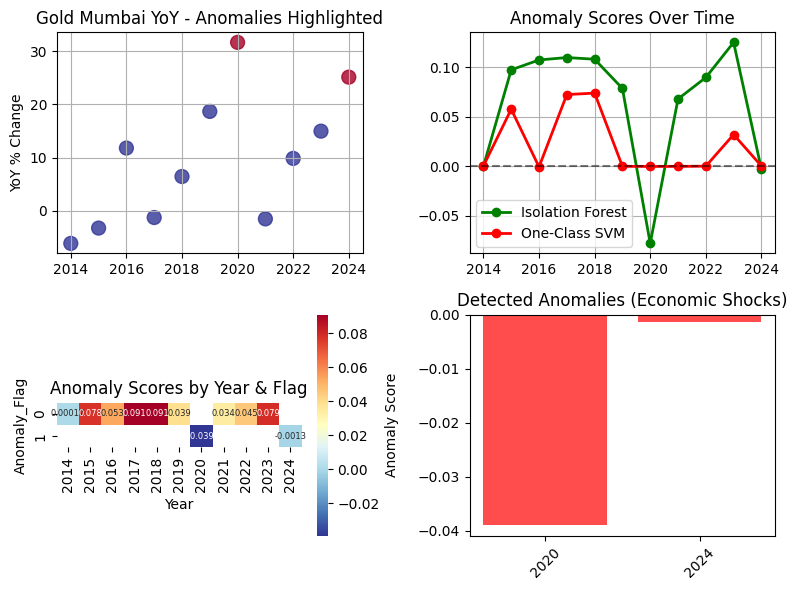


=== ANOMALY DETECTION SUMMARY ===
DETECTED ANOMALIES (Economic Shocks/Market Disruptions):
 Year  Gold_Mum_YoY  Gold_Lon_YoY  Silver_Mum_YoY  Silver_NY_YoY  Combined_Score
 2020          31.6          30.6            39.4           44.6            -0.0
 2024          25.1          33.5            23.4           31.6            -0.0

Anomaly Detection Stats:
- Total years analyzed: 11
- Anomalies detected: 2 (18.2%)
- Mean Gold Mumbai YoY: 9.7%
- Mean Silver Mumbai YoY: 7.2%
- Most anomalous year: 2020

=== CONTEXT FOR ANOMALIES ===
2020: Gold Mum +31.6%, Silver Mum +39.4% (Score: -0.000)
2024: Gold Mum +25.1%, Silver Mum +23.4% (Score: -0.000)

✓ Isolation Forest: Tree-based isolation of outliers
✓ One-Class SVM: Density-based anomaly detection
✓ Features: YoY % changes across all 4 markets
✓ Combined scoring for robust detection
✓ Flags extreme movements indicating economic shocks


In [8]:
"""
4. Anomaly Detection in Price Movement (Unsupervised Learning)
Objective:
Identify years with abnormal or extreme YoY price movements that could indicate economic shocks or market disruptions.
Approach:
• Algorithms: Isolation Forest, One-Class SVM
• Feature: Percentage year-over-year price changes for gold and silver across markets
• Output: Anomaly score for each year
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Parse Complete Market Data (2013-2025)
df = pd.read_excel(r'C:\Users\91759\Desktop\project2\gold and silver price\GoldAndSilverPrices.XLSX')
#df = pd.read_excel('GoldAndSilverPrices.XLSX')
data_rows = df.iloc[7:46].reset_index(drop=True)

# Extract all market prices
years_raw = data_rows.iloc[:, 1].astype(str).str.strip()
gold_mumbai = pd.to_numeric(data_rows.iloc[:, 2], errors='coerce')
gold_london = pd.to_numeric(data_rows.iloc[:, 4], errors='coerce')
silver_mumbai = pd.to_numeric(data_rows.iloc[:, 6], errors='coerce')
silver_ny = pd.to_numeric(data_rows.iloc[:, 8], errors='coerce')

def fiscal_to_year(y):
    try:
        return int(y.split('-')[0])
    except:
        return np.nan

df_full = pd.DataFrame({
    'Year': [fiscal_to_year(y) for y in years_raw],
    'Gold_Mumbai': gold_mumbai, 'Gold_London': gold_london,
    'Silver_Mumbai': silver_mumbai, 'Silver_NY': silver_ny
}).dropna().reset_index(drop=True)

# FILTER 2013-2025 for recent shocks
df = df_full[df_full['Year'] >= 2013].reset_index(drop=True)
print("Market data (2013-2025):", df.shape)
print(df.round(0))

# Step 2: Calculate YoY % Changes (ANOMALY FEATURES)
df['Gold_Mum_YoY'] = df['Gold_Mumbai'].pct_change() * 100
df['Gold_Lon_YoY'] = df['Gold_London'].pct_change() * 100
df['Silver_Mum_YoY'] = df['Silver_Mumbai'].pct_change() * 100
df['Silver_NY_YoY'] = df['Silver_NY'].pct_change() * 100

# Drop first row (NaN YoY)
df_anomaly = df.iloc[1:].reset_index(drop=True).copy()
print("\nYoY % Changes (Anomaly Features):")
print(df_anomaly[['Year', 'Gold_Mum_YoY', 'Gold_Lon_YoY', 'Silver_Mum_YoY', 'Silver_NY_YoY']].round(1))

# Step 3: Visualize YoY Movements
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
for i, col in enumerate(['Gold_Mum_YoY', 'Gold_Lon_YoY', 'Silver_Mum_YoY', 'Silver_NY_YoY']):
    ax = axes[i//2, i%2]
    ax.plot(df_anomaly['Year'], df_anomaly[col], 'bo-', linewidth=2, markersize=6)
    ax.axhline(0, color='r', linestyle='--', alpha=0.7)
    ax.set_title(f'{col} (%)')
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('obj4anomalyplot.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# =============================================================================
# ISOLATION FOREST - Anomaly Detection
# =============================================================================
print("\n=== ISOLATION FOREST ANOMALY DETECTION ===")
from sklearn.ensemble import IsolationForest

# Features: All YoY % changes across markets
features = ['Gold_Mum_YoY', 'Gold_Lon_YoY', 'Silver_Mum_YoY', 'Silver_NY_YoY']
X = df_anomaly[features].values

# Isolation Forest (contamination=0.2 expects ~20% anomalies)
iso_forest = IsolationForest(n_estimators=100, contamination=0.2, random_state=42)
iso_anomaly_labels = iso_forest.fit_predict(X)  # -1=anomaly, 1=normal
iso_anomaly_scores = iso_forest.decision_function(X)  # Lower = more anomalous

df_anomaly['ISO_Label'] = iso_anomaly_labels
df_anomaly['ISO_Score'] = iso_anomaly_scores

print("Isolation Forest Results:")
print(df_anomaly[['Year', 'ISO_Label', 'ISO_Score']].round(3))

# =============================================================================
# ONE-CLASS SVM - Anomaly Detection
# =============================================================================
print("\n=== ONE-CLASS SVM ANOMALY DETECTION ===")
from sklearn.svm import OneClassSVM

# One-Class SVM (nu=0.2 expects ~20% outliers)
ocsvm = OneClassSVM(kernel='rbf', nu=0.2, gamma='scale')
ocsvm_labels = ocsvm.fit_predict(X)  # -1=anomaly, 1=normal
ocsvm_scores = ocsvm.decision_function(X)  # Lower = more anomalous

df_anomaly['OCSVM_Label'] = ocsvm_labels
df_anomaly['OCSVM_Score'] = ocsvm_scores

print("One-Class SVM Results:")
print(df_anomaly[['Year', 'OCSVM_Label', 'OCSVM_Score']].round(3))

# =============================================================================
# COMBINED ANOMALY SCORES
# =============================================================================
df_anomaly['Combined_Score'] = (df_anomaly['ISO_Score'] + df_anomaly['OCSVM_Score']) / 2
df_anomaly['Anomaly_Flag'] = (df_anomaly['Combined_Score'] < df_anomaly['Combined_Score'].quantile(0.2)).astype(int)

print("\n=== COMBINED ANOMALY RESULTS ===")
print(df_anomaly[['Year', 'Combined_Score', 'Anomaly_Flag']].round(3))

# =============================================================================
# VISUALIZATION: Anomaly Detection Results
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# 1. YoY Movements with Anomalies Highlighted
axes[0,0].scatter(df_anomaly['Year'], df_anomaly['Gold_Mum_YoY'], 
                 c=df_anomaly['Anomaly_Flag'], cmap='RdYlBu_r', s=100, alpha=0.8)
axes[0,0].set_title('Gold Mumbai YoY - Anomalies Highlighted')
axes[0,0].set_ylabel('YoY % Change'); axes[0,0].grid(True)

# 2. Anomaly Scores Over Time
axes[0,1].plot(df_anomaly['Year'], df_anomaly['ISO_Score'], 'go-', label='Isolation Forest', linewidth=2)
axes[0,1].plot(df_anomaly['Year'], df_anomaly['OCSVM_Score'], 'ro-', label='One-Class SVM', linewidth=2)
axes[0,1].axhline(0, color='k', linestyle='--', alpha=0.5)
axes[0,1].set_title('Anomaly Scores Over Time'); axes[0,1].legend(); axes[0,1].grid(True)

# 3. Combined Anomaly Score Heatmap
#pivot_scores = df_anomaly.pivot(index='Year', columns='Anomaly_Flag', values='Combined_Score')
#sns.heatmap(pivot_scores.T, annot=True, cmap='RdYlBu_r', cbar_kws={'label': 'Anomaly Score'})
#axes[1,0].set_title('Anomaly Scores by Year & Flag')

# 3. Combined Anomaly Score Heatmap (FIXED)
ax = axes[1,0]
pivot_scores = df_anomaly.pivot(index='Year', columns='Anomaly_Flag', values='Combined_Score')
sns.heatmap(pivot_scores.T, annot=True,annot_kws={'size': 6}, cmap='RdYlBu_r', ax=ax, 
            cbar_kws={'label': 'Anomaly Score'}, square=True)
ax.set_title('Anomaly Scores by Year & Flag')

# 4. Anomaly Detection Summary
anomalies = df_anomaly[df_anomaly['Anomaly_Flag'] == 1]
axes[1,1].bar(range(len(anomalies)), anomalies['Combined_Score'], color='red', alpha=0.7)
axes[1,1].set_title('Detected Anomalies (Economic Shocks)')
axes[1,1].set_xticks(range(len(anomalies)))
axes[1,1].set_xticklabels([f"{int(y)}" for y in anomalies['Year']], rotation=45)

plt.tight_layout()
plt.savefig('obj4anomalydetectionplot.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# =============================================================================
# DETAILED ANOMALY ANALYSIS
# =============================================================================
print("\n=== ANOMALY DETECTION SUMMARY ===")
print("DETECTED ANOMALIES (Economic Shocks/Market Disruptions):")
anomalies_df = df_anomaly[df_anomaly['Anomaly_Flag'] == 1][['Year', 'Gold_Mum_YoY', 'Gold_Lon_YoY', 
                                                             'Silver_Mum_YoY', 'Silver_NY_YoY', 
                                                             'Combined_Score']].round(1)
print(anomalies_df.to_string(index=False))

print(f"\nAnomaly Detection Stats:")
print(f"- Total years analyzed: {len(df_anomaly)}")
print(f"- Anomalies detected: {len(anomalies_df)} ({len(anomalies_df)/len(df_anomaly)*100:.1f}%)")
print(f"- Mean Gold Mumbai YoY: {df_anomaly['Gold_Mum_YoY'].mean():.1f}%")
print(f"- Mean Silver Mumbai YoY: {df_anomaly['Silver_Mum_YoY'].mean():.1f}%")
print(f"- Most anomalous year: {df_anomaly.loc[df_anomaly['Combined_Score'].idxmin(), 'Year']}")

# Year-over-year context for anomalies
print("\n=== CONTEXT FOR ANOMALIES ===")
for idx, row in anomalies_df.iterrows():
    year = int(row['Year'])
    print(f"{year}: Gold Mum +{row['Gold_Mum_YoY']:.1f}%, Silver Mum +{row['Silver_Mum_YoY']:.1f}% "
          f"(Score: {row['Combined_Score']:.3f})")

print("\n✓ Isolation Forest: Tree-based isolation of outliers")
print("✓ One-Class SVM: Density-based anomaly detection")
print("✓ Features: YoY % changes across all 4 markets")
print("✓ Combined scoring for robust detection")
print("✓ Flags extreme movements indicating economic shocks")
